In [91]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory


## Tabular

In [92]:
df = pd.read_csv("files/income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,NaN,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,NaN,Bachelors,NaN,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Image

In [93]:
dataset_train = image_dataset_from_directory(
    "files/Image/",
    labels = "inferred",
    label_mode = "int",
    class_names = ["Cat", "Dog"],
    image_size = (80,80),
    shuffle = True,
    seed = 47,
    validation_split = 0.1, # 10% data untuk validasi
    subset = "training"
)

Found 120 files belonging to 2 classes.
Using 108 files for training.


In [94]:
class_names = dataset_train.class_names

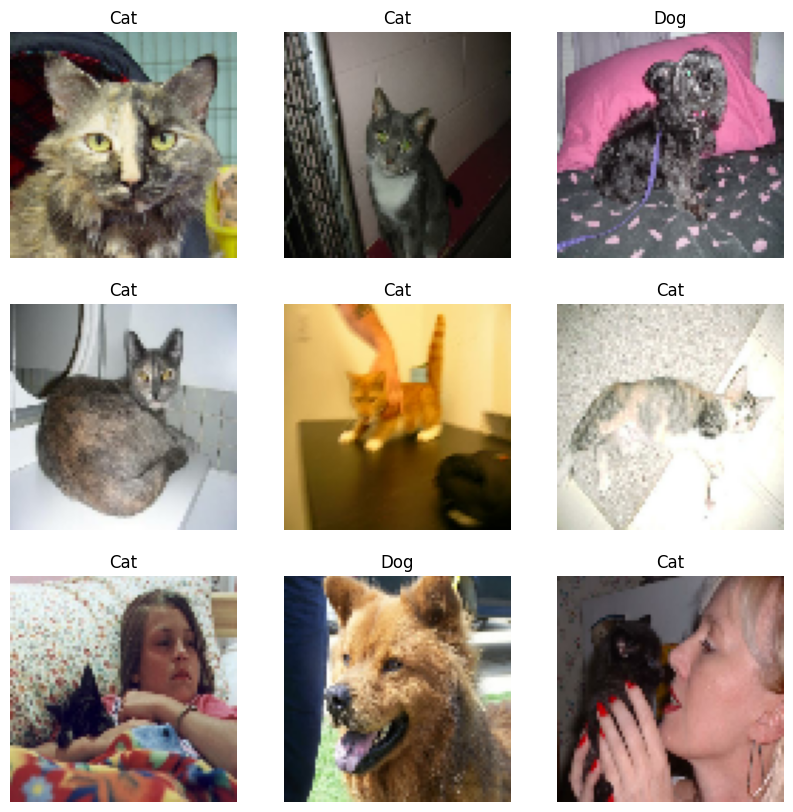

In [95]:
plt.figure(figsize=(10,10))
for images, labels in dataset_train.take(1):
    for i in range (9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

## Transfrom

In [96]:
def augment(x,y):
    images = tf.image.random_brightness(x,max_delta=0.5)
    return images,y

In [97]:
dataset_train = dataset_train.map(augment)

In [98]:
model = keras.Sequential()

In [99]:
model = keras.Sequential([
        layers.Input((80,80,3)),
        
        # Hidden layer
        layers.Conv2D(16,3),
        layers.Conv2D(32,3),
        layers.MaxPool2D(),
        layers.Flatten(),

        # Output layer
        layers.Dense(2)
])

model.compile(optimizer='adam',
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics = ["accuracy"]
)

In [100]:
model.fit(dataset_train, epochs=10, verbose=1)

Epoch 1/10
4/4 [==============================] - 1s 72ms/step - loss: 1304.7726 - accuracy: 0.4259
Epoch 2/10
4/4 [==============================] - 0s 71ms/step - loss: 363.3403 - accuracy: 0.4907
Epoch 3/10
4/4 [==============================] - 0s 78ms/step - loss: 327.7058 - accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 70ms/step - loss: 121.0727 - accuracy: 0.5278
Epoch 5/10
4/4 [==============================] - 0s 68ms/step - loss: 62.1774 - accuracy: 0.6574
Epoch 6/10
4/4 [==============================] - 0s 69ms/step - loss: 43.6566 - accuracy: 0.7593
Epoch 7/10
4/4 [==============================] - 0s 68ms/step - loss: 33.3330 - accuracy: 0.6759
Epoch 8/10
4/4 [==============================] - 0s 69ms/step - loss: 8.4897 - accuracy: 0.9259
Epoch 9/10
4/4 [==============================] - 0s 74ms/step - loss: 8.8300 - accuracy: 0.8889
Epoch 10/10
4/4 [==============================] - 0s 84ms/step - loss: 2.4125 - accuracy: 0.9537


## ETL 
* Extract

In [104]:
dataset = list(tfds.list_builders())

for data in dataset :
    print(data)

abstract_reasoning
accentdb
aeslc
aflw2k3d
ag_news_subset
ai2_arc
ai2_arc_with_ir
amazon_us_reviews
anli
answer_equivalence
arc
asqa
asset
assin2
bair_robot_pushing_small
bccd
beans
bee_dataset
beir
big_patent
bigearthnet
billsum
binarized_mnist
binary_alpha_digits
ble_wind_field
blimp
booksum
bool_q
bucc
c4
caltech101
caltech_birds2010
caltech_birds2011
cardiotox
cars196
cassava
cats_vs_dogs
celeb_a
celeb_a_hq
cfq
cherry_blossoms
chexpert
cifar10
cifar100
cifar100_n
cifar10_1
cifar10_corrupted
cifar10_n
citrus_leaves
cityscapes
civil_comments
clevr
clic
clinc_oos
cmaterdb
cnn_dailymail
coco
coco_captions
coil100
colorectal_histology
colorectal_histology_large
common_voice
conll2003
controlled_noisy_web_labels
coqa
cos_e
cosmos_qa
covid19
covid19sum
crema_d
criteo
cs_restaurants
curated_breast_imaging_ddsm
cycle_gan
d4rl_adroit_door
d4rl_adroit_hammer
d4rl_adroit_pen
d4rl_adroit_relocate
d4rl_antmaze
d4rl_mujoco_ant
d4rl_mujoco_halfcheetah
d4rl_mujoco_hopper
d4rl_mujoco_walker2d
dart
d

In [105]:
data,info = tfds.load("beans",
            split="train+test",
            shuffle_files=True,
            with_info=True,
            as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\TUF-GAMING\tensorflow_datasets\beans\0.1.0.incompleteL7X7QS\beans-train.tfrecord*...:   0%|…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\TUF-GAMING\tensorflow_datasets\beans\0.1.0.incompleteL7X7QS\beans-validation.tfrecord*...: …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\TUF-GAMING\tensorflow_datasets\beans\0.1.0.incompleteL7X7QS\beans-test.tfrecord*...:   0%| …

Dataset beans downloaded and prepared to C:\Users\TUF-GAMING\tensorflow_datasets\beans\0.1.0. Subsequent calls will reuse this data.


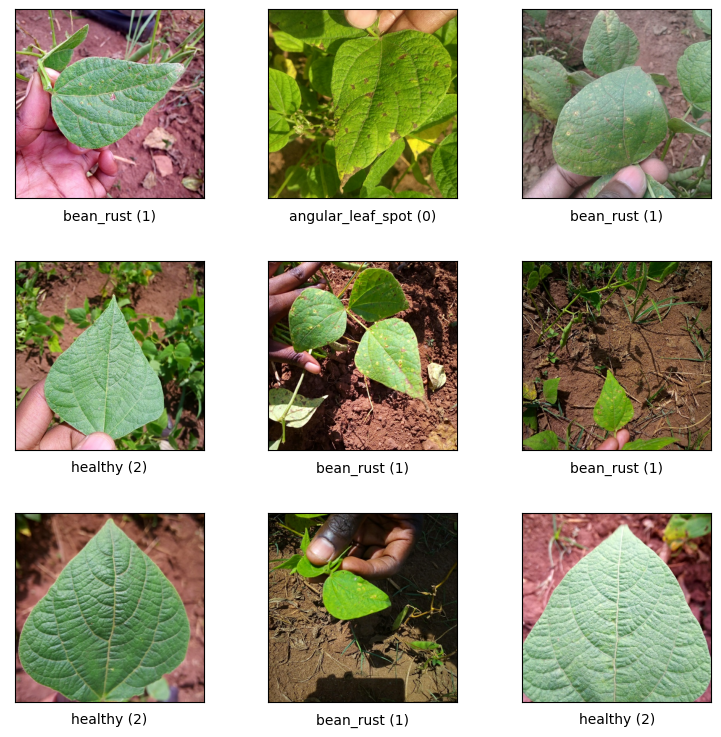

In [106]:
vis = tfds.visualization.show_examples(data,info)

## Transfrom dataset BEANS
- Batch

In [107]:
data = data.batch(32)

* One Hot (label)

In [110]:
def one_hot(image,label):
    label = tf.one_hot(tf.cast(label,tf.int32),3) #angka 3 menunjuk class nya

    label = tf.cast(label,tf.float32)
    return image,label

data = data.map(one_hot)

In [112]:
print("Image Feature :", info.features["image"])

Image Feature : Image(shape=(500, 500, 3), dtype=tf.uint8)


In [118]:
model_beans = keras.Sequential([
        layers.Input((500,500,3)),
        
        # Hidden layer
        layers.Conv2D(16,3, activation="relu"),
        layers.Conv2D(32,3, activation="relu"),
        layers.MaxPool2D(),
        layers.Flatten(),

        # Output layer
        layers.Dense(3)
])

model_beans.compile(optimizer='adam',
        loss = "categorical_crossentropy",
        metrics = ["accuracy"]
)

In [ ]:
model_beans.fit(data,epochs=10, verbose=1)

In [ ]:
History = model_beans.fit(data, epochs=10)

plt.xlabel('epoch')
plt.ylabel('accuracy')
aplha = plt.plot(History.history['accuracy'])